Tensorboard demo using handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

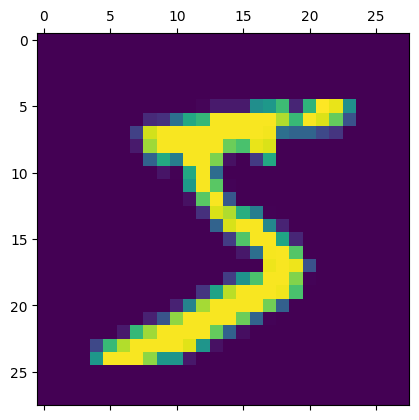

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattended = x_test.reshape(len(x_test),28*28)

In [10]:
x_train_flattened.shape

(60000, 784)

Using Flatten layer so that we don't have to call .reshape on input dataset

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2771 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1246 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0653 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0538 - accuracy: 0.9838


In [12]:
model.get_weights()

[array([[ 0.05014524, -0.04577167,  0.00130687, ..., -0.02276035,
         -0.04127941, -0.03680706],
        [ 0.04273771, -0.04817957,  0.05579206, ..., -0.0329875 ,
         -0.01685821, -0.06916273],
        [-0.02109139,  0.07503548, -0.06019146, ..., -0.03682601,
         -0.0252599 ,  0.06679679],
        ...,
        [ 0.0187866 ,  0.00760484, -0.01562539, ..., -0.04497061,
         -0.06061181, -0.04113466],
        [-0.04613047, -0.05255899,  0.04826531, ...,  0.00268544,
         -0.05734266, -0.05077328],
        [ 0.05344319, -0.08109868, -0.03145315, ..., -0.06294325,
         -0.08044084,  0.03901526]], dtype=float32),
 array([-0.02698852, -0.10519971,  0.06694975, -0.05529471, -0.02216614,
         0.0670924 , -0.03221249, -0.08737103, -0.02320046,  0.02204584,
         0.05904856,  0.16592513,  0.02437419, -0.03539124,  0.09232241,
        -0.0738994 , -0.09465998,  0.04317654, -0.04874386,  0.17695987,
         0.17849267, -0.00694839, -0.16627721,  0.16679658, -0.079